<table align="right" width=100%>
    <tr>
        <td width="15%">
            <img src="house.jpg">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=24px>
                    <b>LIFE EXPECTANCY ANALYSIS AND PREDICTION
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## 
<tr>
        <td>
            <div align="right">
                <font size=4px>
                    <b>- USING ML AND POWERBI
                    </b>
                </font>
            </div>
        </td>
    </tr>

# Problem Statement:
The data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis.

# Data Definition:

<i>Input variables:</i>


1. **Country** Country names
2. **Year**	 Year of data recorded
3. **Status**	Developed or Developing status
4. **Adult Mortality**	Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
5. **infant deaths** Number of Infant Deaths per 1000 population
6. **Alcohol**	Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
7. **percentage expenditure**	Expenditure on health as a percentage of Gross Domestic Product per capita(%)
8. **Hepatitis B**	Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
9. **Measles**	number of reported cases per 1000 population
10. **BMI**	Average Body Mass Index of entire population
11. **under-five deaths** Number of under-five deaths per 1000 population

12. **Polio**	Polio (Pol3) immunization coverage among 1-year-olds (%)

13. **Total expenditure**	General government expenditure on health as a percentage of total government expenditure (%)

14. **Diphtheria**	Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

15. **HIV/AIDS**Deaths per 1 000 live births HIV/AIDS (0-4 years)

16. **GDP**	Gross Domestic Product per capita (in USD)

17. **Population**	Population of the country

18. **thinness 1-19 years**	Prevalence of thinness among children and adolescents for Age 10 to 19 (% )

19. **thinness 5-9 years**	Prevalence of thinness among children for Age 5 to 9(%)

20. **Income composition of resources**	Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

21. **Schooling**	Number of years of Schooling(years)


<i>Output variable (desired target):</i>

22. **Life expectancy**	(target) Life Expectancy in years



<a id='mport Data From MySQL Database'></a>
# 1. Import Data From MySQL Database

In [238]:
# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector as my_sql

<a id='MySQL Connect'></a>
##  1.1 MySQL Connect

In [239]:
db=my_sql.connect(host="localhost",user="root",password="mytheesh@1626",database="capstone_project",auth_plugin='mysql_native_password')
db

In [240]:
#Set cursor Object_
mycursor=db.cursor()
mycursor=db.cursor( buffered=True , dictionary=True)

<a id='Read Data From MySQL Database'></a>
## 1.2 Read Data From MySQL Database


In [241]:
#Access table from yout Datbase
mycursor.execute('SELECT * FROM `led`')

In [242]:
ldf=pd.DataFrame(mycursor.fetchall())
data=ldf.copy()


In [243]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.696514,327582,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.744976,31731688,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.959000,3696958,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.537231,2978599,18.2,18.2,0.454,9.5


<a id='Data Preproccessing'></a>
# 2. Data Preprocessing

<a id='Data_Types'></a>
## 2.1 Data Types and Dimensions

In [244]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   int64  
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   int64  
 9   Measles                          2938 non-null   int64  
 10  BMI                              2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [245]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [246]:
# 'shape' function gives the total number of rows and columns in the data
data.shape 

(2938, 22)

- We see the dataframe has 22 columns and 2938 observations

<a id='Checking_for_Missing_Values'></a>
## 2.2 Checking for Missing Values

In [247]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = data.isnull().sum().sort_values(ascending = False)          

# calculate the percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (data.isnull().sum()*100/data.isnull().count()).sort_values(ascending = False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Country,0,0.0
Year,0,0.0
Income composition of resources,0,0.0
thinness 5-9 years,0,0.0
thinness 1-19 years,0,0.0
Population,0,0.0
GDP,0,0.0
HIV/AIDS,0,0.0
Diphtheria,0,0.0
Total expenditure,0,0.0


<a id='Data_Correction'></a>
## 3.3 Data Correction

In [248]:
data.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                      int64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                          int64
Measles                              int64
BMI                                float64
under-five deaths                    int64
Polio                                int64
Total expenditure                  float64
Diphtheria                           int64
HIV/AIDS                           float64
GDP                                float64
Population                           int64
thinness  1-19 years               float64
thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
dtype: object

**Year is an object and not a int, the values we saw above were clearly numbers
Lets try converting the column using astype()**

In [249]:
#Let's look at the unique elements of Year to look for discrepancies 
data.Year.unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000], dtype=int64)

In [250]:
data.Year = data.Year.astype('object')
data.Year.dtypes


dtype('O')

<a id='Statistical_Summary'></a>
## 2.3 Statistical Summary
Here we take a look at the summary of each attribute. This includes the count, mean, the min and max values as well as some percentiles for numeric variables.

In [251]:
# data frame with numerical features
data.describe()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.00000,2938.000000
mean,68.989312,164.235534,30.303948,4.298928,738.251295,65.705582,2419.592240,37.877774,42.035739,82.016338,5.481406,81.791695,1.742103,6342.091419,9.923150e+06,4.783696,4.813955,0.59188,11.327434
std,10.327437,124.451093,117.926501,4.079748,1987.914858,38.878316,11467.272489,20.344920,160.445548,24.271835,2.875063,24.544100,5.077785,13409.501883,5.407586e+07,4.424924,4.512880,0.25114,4.265626
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,63.000000,73.000000,0.000000,0.470000,4.685343,24.000000,0.000000,19.000000,0.000000,77.000000,3.740000,78.000000,0.100000,190.174435,5.874250e+03,1.500000,1.500000,0.46500,9.500000
50%,72.000000,144.000000,3.000000,3.130000,64.912906,87.000000,17.000000,43.000000,4.000000,93.000000,5.540000,93.000000,0.100000,1171.983435,5.393575e+05,3.300000,3.300000,0.66200,12.100000
75%,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.77200,14.100000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.94800,20.700000


In [252]:
# data frame with categorical features
data.describe(include='object')

,Country,Year,Status
count,2938,2938,2938
unique,193,16,2
top,Afghanistan,2013,Developing
freq,16,193,2426


<a id='Exploratory Data Analysis'></a>
# 3. Exploratory Data Analysis


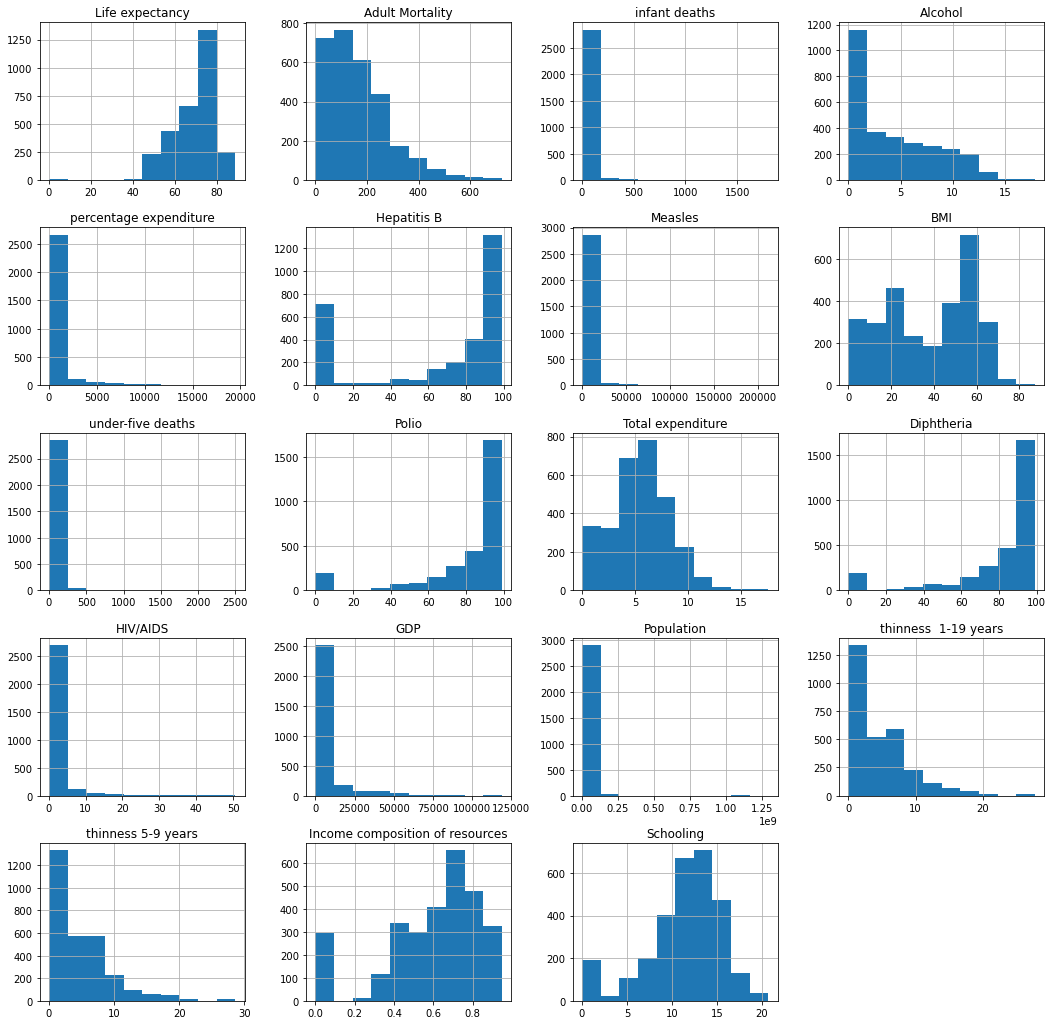

In [253]:
fig = data.hist(figsize = (18,18))


<a id='Visualization of the Data - PowerBI Report'></a>
## 3.1  Visualization of the Data - PowerBI Report


#### Interface Jupyter and PowerBI to visualize the data.
  - Get the report from powerBI by DeviceCodeLoginAuthentication from PowerBIClient Module.

In [254]:
#import library
from powerbiclient import Report, models

In [255]:
# Import the DeviceCodeLoginAuthentication class to authenticate against Power BI
from powerbiclient.authentication import DeviceCodeLoginAuthentication

# Initiate device authentication
device_auth = DeviceCodeLoginAuthentication()

Performing interactive authentication. Please follow the instructions on the terminal.
 To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code HMPRZWHLK to authenticate.
You have logged in.
Interactive authentication successfully completed.


In [256]:
group_id="25ea950c-a927-44ab-a709-62db15b22de7"
report_id="77100a0b-f74a-40e5-ad28-7b3afa16ebe3"
report = Report(group_id=group_id, report_id=report_id, auth=device_auth)

report

Report()

#### Use this Link to view if not interface
https://app.powerbi.com/reportEmbed?reportId=77100a0b-f74a-40e5-ad28-7b3afa16ebe3&autoAuth=true&ctid=b4b03c8c-bd4f-4373-b65b-51b21c3daf7b&config=eyJjbHVzdGVyVXJsIjoiaHR0cHM6Ly93YWJpLWluZGlhLWNlbnRyYWwtYS1wcmltYXJ5LXJlZGlyZWN0LmFuYWx5c2lzLndpbmRvd3MubmV0LyJ9

<a id='import_packages'></a>
## 3.2 Statistical Analysis 
 - On factors influencing Life Expectancy

### 3.2.1 The impact of Immunization coverage on life Expectancy


In [257]:
group_id="25ea950c-a927-44ab-a709-62db15b22de7"
report_id="1be3cf5a-bc0b-4aa3-bbf5-7515f4011320"
report2 = Report(group_id=group_id, report_id=report_id, auth=device_auth)
report2

Report()

#### Use this Link to view if not interface
https://app.powerbi.com/reportEmbed?reportId=1be3cf5a-bc0b-4aa3-bbf5-7515f4011320&autoAuth=true&ctid=b4b03c8c-bd4f-4373-b65b-51b21c3daf7b&config=eyJjbHVzdGVyVXJsIjoiaHR0cHM6Ly93YWJpLWluZGlhLWNlbnRyYWwtYS1wcmltYXJ5LXJlZGlyZWN0LmFuYWx5c2lzLndpbmRvd3MubmV0LyJ9

### 3.2.2 How Percentage Expenditure will affect lower life expectancy?

In [258]:
group_id="25ea950c-a927-44ab-a709-62db15b22de7"
report_id="d211d54d-e9c9-4f0c-8568-a765b67f5080"
report3 = Report(group_id=group_id, report_id=report_id, auth=device_auth)
report3

Report()

#### Use this Link to view if not interface
https://app.powerbi.com/reportEmbed?reportId=d211d54d-e9c9-4f0c-8568-a765b67f5080&autoAuth=true&ctid=b4b03c8c-bd4f-4373-b65b-51b21c3daf7b&config=eyJjbHVzdGVyVXJsIjoiaHR0cHM6Ly93YWJpLWluZGlhLWNlbnRyYWwtYS1wcmltYXJ5LXJlZGlyZWN0LmFuYWx5c2lzLndpbmRvd3MubmV0LyJ9

### 3.2.3 How does Infant and Adult mortality rates affect life expectancy?

In [259]:
group_id="25ea950c-a927-44ab-a709-62db15b22de7"
report_id="4a421673-aa6f-46b0-9819-a72f61e3c932"
report4 = Report(group_id=group_id, report_id=report_id, auth=device_auth)
report4

Report()

#### Use this Link to view if not interface
https://app.powerbi.com/reportEmbed?reportId=4a421673-aa6f-46b0-9819-a72f61e3c932&autoAuth=true&ctid=b4b03c8c-bd4f-4373-b65b-51b21c3daf7b&config=eyJjbHVzdGVyVXJsIjoiaHR0cHM6Ly93YWJpLWluZGlhLWNlbnRyYWwtYS1wcmltYXJ5LXJlZGlyZWN0LmFuYWx5c2lzLndpbmRvd3MubmV0LyJ9

<a id='Correlation'></a>
## 3.3 Correlation

In [260]:
corr = data.corr()
corr


,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Life expectancy,1.000000,-0.609053,-0.175069,0.359594,0.358442,0.220782,-0.140250,0.507116,-0.198861,0.427613,0.139066,0.439868,-0.504904,0.404024,-0.023382,-0.397560,-0.392858,0.581702,0.561590
Adult Mortality,-0.609053,1.000000,0.079671,-0.181289,-0.240716,-0.136102,0.032032,-0.397616,0.095036,-0.280854,-0.108030,-0.281226,0.523625,-0.279072,-0.003681,0.288761,0.294409,-0.384448,-0.364248
infant deaths,-0.175069,0.079671,1.000000,-0.105441,-0.085612,-0.139252,0.501128,-0.224995,0.996629,-0.161685,-0.098366,-0.166218,0.025231,-0.101046,0.551762,0.460979,0.466683,-0.136524,-0.169512
Alcohol,0.359594,-0.181289,-0.105441,1.000000,0.353508,-0.042645,-0.042596,0.303702,-0.102020,0.220341,0.391770,0.217430,-0.034463,0.302034,-0.023455,-0.381284,-0.371237,0.275001,0.310224
percentage expenditure,0.358442,-0.240716,-0.085612,0.353508,1.000000,-0.114676,-0.056596,0.231401,-0.087852,0.148935,0.203799,0.145490,-0.097857,0.901691,-0.015937,-0.245080,-0.246709,0.362570,0.354954
Hepatitis B,0.220782,-0.136102,-0.139252,-0.042645,-0.114676,1.000000,-0.120372,0.182383,-0.152917,0.420626,-0.013079,0.494625,-0.124786,-0.048594,-0.039480,-0.073249,-0.075832,0.203571,0.192286
Measles,-0.140250,0.032032,0.501128,-0.042596,-0.056596,-0.120372,1.000000,-0.170780,0.507809,-0.126345,-0.076083,-0.132058,0.030899,-0.069287,0.237178,0.224091,0.220410,-0.141007,-0.147062
BMI,0.507116,-0.397616,-0.224995,0.303702,0.231401,0.182383,-0.170780,1.000000,-0.235946,0.296469,0.199239,0.294750,-0.239067,0.276873,-0.069139,-0.493962,-0.501069,0.434168,0.449478
under-five deaths,-0.198861,0.095036,0.996629,-0.102020,-0.087852,-0.152917,0.507809,-0.235946,1.000000,-0.179404,-0.099434,-0.186325,0.038062,-0.104213,0.539391,0.462538,0.467090,-0.152660,-0.183038
Polio,0.427613,-0.280854,-0.161685,0.220341,0.148935,0.420626,-0.126345,0.296469,-0.179404,1.000000,0.137835,0.697484,-0.155407,0.191444,-0.040769,-0.191103,-0.192173,0.341712,0.352066


<a id='Correlation'></a>
### 3.3.1  Correlation Map [ Heat_Map]

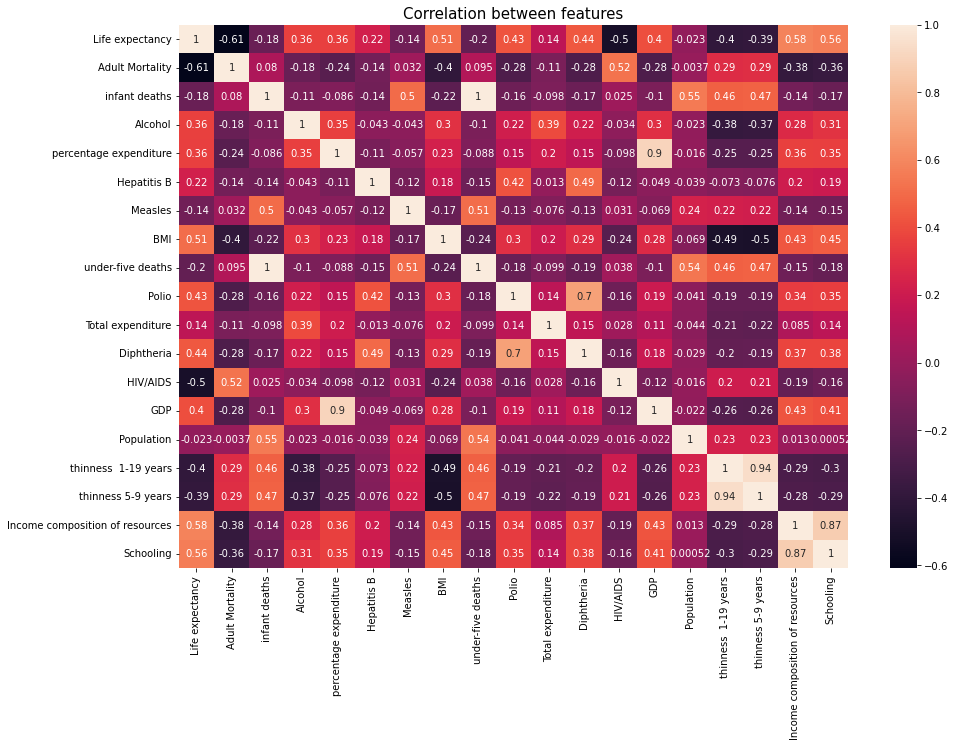

In [261]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)
plt.title('Correlation between features', fontsize=15)
plt.show()

By looking at the correlation matrix we can see that variables 'GDP','percentage expenditure', 'infant death' and 'under five deaths' have a strong positive correlation with each other. These feature pairs are strongly correlated to each other. Ideally, we should not select these features together for training the model.

In [262]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder=LabelEncoder()
data.drop(['Year','Status','percentage expenditure','infant deaths'], axis=1, inplace=True)
data['Country']=labelencoder.fit_transform(data['Country'])
data.head()

,Country,Life expectancy,Adult Mortality,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,65.0,263,0.01,65,1154,19.1,83,6,8.16,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
1,0,59.9,271,0.01,62,492,18.6,86,58,8.18,62,0.1,612.696514,327582,17.5,17.5,0.476,10.0
2,0,59.9,268,0.01,64,430,18.1,89,62,8.13,64,0.1,631.744976,31731688,17.7,17.7,0.470,9.9
3,0,59.5,272,0.01,67,2787,17.6,93,67,8.52,67,0.1,669.959000,3696958,17.9,18.0,0.463,9.8
4,0,59.2,275,0.01,68,3013,17.2,97,68,7.87,68,0.1,63.537231,2978599,18.2,18.2,0.454,9.5


In [263]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   int32  
 1   Life expectancy                  2938 non-null   float64
 2   Adult Mortality                  2938 non-null   int64  
 3   Alcohol                          2938 non-null   float64
 4   Hepatitis B                      2938 non-null   int64  
 5   Measles                          2938 non-null   int64  
 6   BMI                              2938 non-null   float64
 7   under-five deaths                2938 non-null   int64  
 8   Polio                            2938 non-null   int64  
 9   Total expenditure                2938 non-null   float64
 10  Diphtheria                       2938 non-null   int64  
 11  HIV/AIDS                         2938 non-null   float64
 12  GDP                 

In [264]:
data.columns

Index(['Country', 'Life expectancy', 'Adult Mortality', 'Alcohol',
       'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio',
       'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'thinness  1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

<a id='Splitting the data into X and y'></a>
## 3.4 Splitting the data into x and y


In [265]:
#splitting into dependant & independant variables
life = data['Life expectancy']
features = data.drop(['Life expectancy'], axis=1)

<a id='Splitting the data into Train and Test Splits'></a>
### 3.4.1 Splitting the data into Train and Test Splits

In [266]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, life, test_size = 0.2, random_state = 0)

In [267]:
y_train

683     78.7
478     58.5
2359    76.2
971     58.2
880     78.0
        ... 
763     58.6
835     57.9
1653    62.7
2607    66.6
2732    71.0
Name: Life expectancy, Length: 2350, dtype: float64

# 4. Modelling 

#### FIND THE MOST SUITABLE ALGORITHM

In [268]:
# Importing the Models and Model Evaluators
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

<a id='Put models in a dictionary'></a>
## 4.1 Put models in a dictionary

In [269]:
models = { "Linear Regression": LinearRegression(), 
           "Random Forest": RandomForestRegressor(),
           "Decision tree": DecisionTreeRegressor()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(0)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores


<a id='Evaluate and Compare the Model Scores'></a>
### 4.1.1 Evaluate and Compare the Model Scores

In [270]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'Linear Regression': 0.7154471222869601,
 'Random Forest': 0.9627302735032439,
 'Decision tree': 0.9187496563957125}

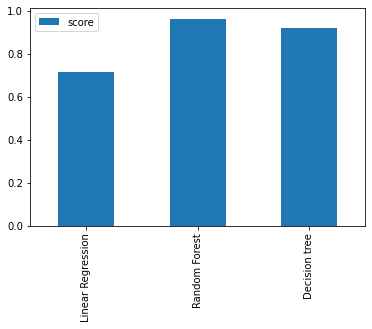

In [276]:
model_compare = pd.DataFrame(model_scores, index=['score'])

model_compare.T.plot.bar();


# 5. Hyerparameter tuning with RandomizedSearchCV

In [277]:
# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           }

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                              random_state=42),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [278]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_features': 0.5,
 'max_depth': 10}

In [279]:
# Most ideal hyperparamters
ideal_model = RandomForestRegressor(n_estimators=30,
                                    min_samples_split=2,
                                    min_samples_leaf=1,
                                    max_features=0.5,
                                    max_depth=10,
                                    n_jobs=-1,
                                    random_state=101)

# Fit the ideal model
ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features=0.5, n_estimators=30,
                      n_jobs=-1, random_state=101)

In [280]:
 ideal_model.score(X_test, y_test)

0.9525572919204535

In [281]:
# Make predictions on test data
y_preds=ideal_model.predict(X_test)

In [282]:
y_preds

array([77.546384  , 66.25542715, 53.23504178, 59.80548007, 57.08986609,
       69.64476198, 72.96658812, 81.42164177, 73.62741614, 52.1535345 ,
       65.66703329, 81.62905356, 74.39019596, 75.63393712, 64.93314147,
       73.79589355, 56.98333307, 65.39600389, 72.53526906, 82.34885182,
       72.83445388, 72.04696427, 72.99961904, 82.19175371, 69.47816461,
       61.51419326, 82.52410018, 72.24523044, 72.90248976, 71.00755277,
       74.54812428, 49.64570452, 79.06451503, 74.20285857, 74.23297311,
       73.25442581, 72.90674391, 82.16433325, 59.99917381, 73.39263966,
       58.1216528 , 76.04270624, 82.71268628, 73.81333942, 73.83956826,
       79.15884814, 55.85487313, 74.03022946, 53.45513271, 76.44863545,
       74.35179882, 55.60814613, 73.27012191, 71.42802973, 72.83221405,
       71.91327365, 80.9921302 , 73.7481552 , 56.6062139 , 72.24699487,
       68.08557036, 73.1964998 , 80.74612619, 68.8574158 , 60.93343938,
       74.99367546, 68.38159766, 73.62536896, 49.90433044, 74.97

# 6. Evaluating the Model

In [283]:
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_preds))
print("Mean absolute error: %.2f"% mean_absolute_error(y_test, y_preds))
print('R_square score: %.2f' % r2_score(y_test, y_preds))

Mean squared error: 4.71
Mean absolute error: 1.40
R_square score: 0.95


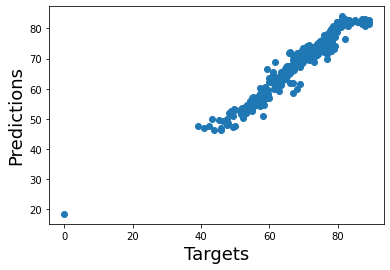

In [284]:
plt.scatter(y_test,y_preds)
plt.xlabel('Targets' ,size = 18)
plt.ylabel('Predictions',size = 18)
plt.show()

# 7. Feature Importance

## 7.1 Find feature importance of our best model

In [285]:
ideal_model.feature_importances_

array([0.00333236, 0.28492769, 0.01345333, 0.00246123, 0.00227493,
       0.05408883, 0.02398629, 0.00979204, 0.00656303, 0.0084995 ,
       0.28561834, 0.00580018, 0.0082328 , 0.01108761, 0.01280378,
       0.2268506 , 0.04022748])

In [286]:
# Function for plotting feature importance
def plot_features(columns, importances):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"], df["feature_importances"])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

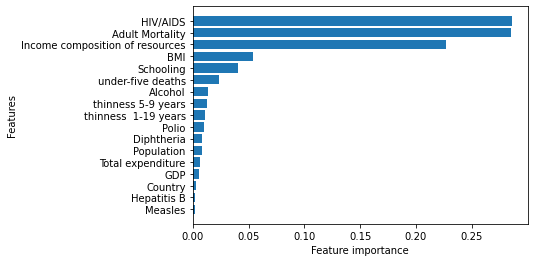

In [287]:
plot_features(X_train.columns, ideal_model.feature_importances_)

# 8. COMPARATIVE ANALYSIS OF LIFE EXPECTANCY 

<tr>
        <td>
            <div align="LEFT">
                <font size=2px>
                    <b>- BETWEEN DEVELOPED AND DEVELOPING COUNTRIES
                    </b>
                </font>
            </div>
        </td>
    </tr>
    

In [288]:
le_df = ldf.copy()

#dropping unwanted columns
le_df.drop(['Year', 'Status'], axis=1, inplace=True)

#renaming columns
le_df.rename(columns={'Life expectancy':'Life Expectancy', 'infant deaths':'Infant Deaths', 
                      'percentage expenditure':'Percentage Expenditure',
                      'under-five deaths':'Under-Five Deaths',
                     'thinness  1-19 years':'Thinness 10-19 years',
                      'thinness 5-9 years':'Thinness 5-9 years'}, inplace=True)


numeric_data = le_df.select_dtypes(include=np.number) 
numeric_col = numeric_data.columns  
for i in numeric_col:
    mean = le_df[i].mean()
    le_df[i].fillna(mean,inplace = True)
le_df = le_df.groupby('Country').mean()
le_df

,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Under-Five Deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 10-19 years,Thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.5625,2362.2500,15.51875,107.5625,48.3750,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250
Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.0000,53.3750,49.06875,0.9375,98.1250,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750
Algeria,73.61875,108.1875,20.3125,0.381250,236.185241,58.5000,1943.8750,48.74375,23.5000,91.7500,4.316250,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250
Angola,49.01875,328.5625,83.7500,5.381875,102.100268,39.5000,3561.3125,18.01875,132.6250,46.1250,3.674375,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375
Antigua and Barbuda,75.05625,127.5000,0.0000,7.452500,1001.585226,92.1250,0.0000,38.42500,0.0000,96.9375,4.491875,98.3125,0.12500,9759.305728,0.000000e+00,3.42500,3.37500,0.488625,8.84375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),73.38750,163.0000,9.3750,6.956250,0.000000,66.2500,165.0000,54.48750,10.7500,74.6875,4.686250,68.5000,0.10000,0.000000,0.000000e+00,1.65000,1.56250,0.726812,12.78750
Viet Nam,74.77500,126.5625,29.1875,2.894375,0.000000,71.1250,4232.9375,11.18750,36.5000,94.9375,5.603750,91.7500,0.14375,0.000000,0.000000e+00,14.92500,15.62500,0.627062,11.51250
Yemen,63.86250,211.8125,39.3750,0.044375,0.000000,55.6875,2761.1875,33.48750,51.6250,67.1250,4.692500,72.6250,0.10000,0.000000,0.000000e+00,13.83125,13.75000,0.475500,8.50625


## 8.1 Splitting into dependant & independant variables

In [290]:
life = le_df['Life Expectancy']
features = le_df.drop(['Life Expectancy'], axis=1)

## 8.2 Plot Graph

In [291]:
countries = ['Brazil', 'Russian Federation', 'South Africa', 'China', 'India', 'United States of America', 'France', 'Germany', 'United Kingdom of Great Britain and Northern Ireland', 'Australia']
life_exp = []
hiv = []
adult_mortality = []
percent_expenditure = []
for i in countries:
    life_exp.append(life.loc[i])
    percent_expenditure.append(features.loc[i]['Percentage Expenditure'])
    hiv.append(features.loc[i]['HIV/AIDS'])
    adult_mortality.append(features.loc[i]['Adult Mortality'])

### 8.2.1 HIV Comparison


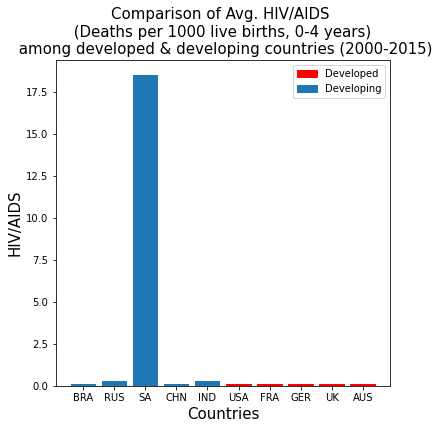

In [292]:
#HIV comparison plot
countries1 = ['BRA', 'RUS', 'SA', 'CHN', 'IND', 'USA', 'FRA', 'GER', 'UK', 'AUS']
fig = plt.figure(figsize = (6,6))
colors = {'Developed':'red', 'Developing':'#1f77b4'} 
labels = list(colors.keys())
barlist = plt.bar(countries1, hiv)
barlist[5].set_color('r')
barlist[6].set_color('r')
barlist[7].set_color('r')
barlist[8].set_color('r')
barlist[9].set_color('r')
plt.title('Comparison of Avg. HIV/AIDS \n (Deaths per 1000 live births, 0-4 years) \n among developed & developing countries (2000-2015)', fontsize=15)
plt.xlabel('Countries', fontsize = 15)
plt.ylabel('HIV/AIDS', fontsize = 15)
handles = [plt.Rectangle((0,0),1,1, color = colors[label]) for label in labels]
plt.legend(handles, labels)

## 8.2.2 Adult Mortality comparison

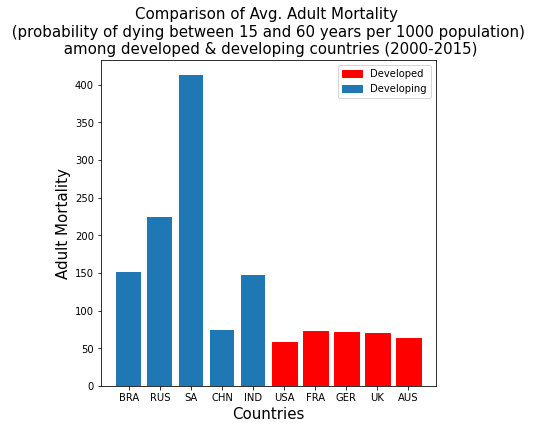

In [293]:
#Adult Mortality comparison plot
countries1 = ['BRA', 'RUS', 'SA', 'CHN', 'IND', 'USA', 'FRA', 'GER', 'UK', 'AUS']
fig = plt.figure(figsize = (6,6))
colors = {'Developed':'red', 'Developing':'#1f77b4'} 
labels = list(colors.keys())
barlist = plt.bar(countries1, adult_mortality)
barlist[5].set_color('r')
barlist[6].set_color('r')
barlist[7].set_color('r')
barlist[8].set_color('r')
barlist[9].set_color('r')
plt.title('Comparison of Avg. Adult Mortality \n (probability of dying between 15 and 60 years per 1000 population) \n among developed & developing countries (2000-2015)', fontsize=15)
plt.xlabel('Countries', fontsize = 15)
plt.ylabel('Adult Mortality', fontsize = 15)
handles = [plt.Rectangle((0,0),1,1, color = colors[label]) for label in labels]
plt.legend(handles, labels)

### 8.2.3 Life Expectancy comparison

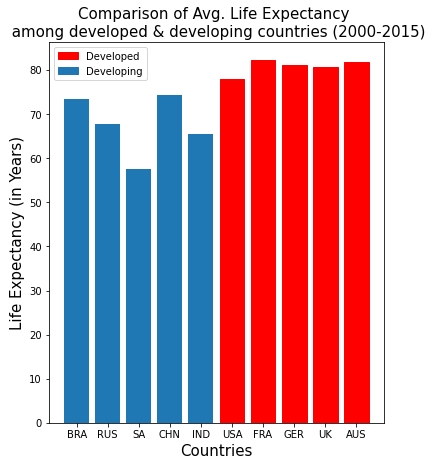

In [294]:
#Life Expectancy comparison plot
countries1 = ['BRA', 'RUS', 'SA', 'CHN', 'IND', 'USA', 'FRA', 'GER', 'UK', 'AUS']
fig = plt.figure(figsize = (6,7))
colors = {'Developed':'red', 'Developing':'#1f77b4'} 
labels = list(colors.keys())
barlist = plt.bar(countries1, life_exp)
barlist[5].set_color('r')
barlist[6].set_color('r')
barlist[7].set_color('r')
barlist[8].set_color('r')
barlist[9].set_color('r')
plt.title('Comparison of Avg. Life Expectancy \n among developed & developing countries (2000-2015)', fontsize=15)
plt.xlabel('Countries', fontsize = 15)
plt.ylabel('Life Expectancy (in Years)', fontsize = 15)
handles = [plt.Rectangle((0,0),1,1, color = colors[label]) for label in labels]
plt.legend(handles, labels)

#### CONLUSION

The prediction model is trained using three regression models, namely Linear Regression, Decision Tree Regressor and Random Forest Regressor. The selection of model is done on the basis of R 2 score, Mean Squared Error & Mean Absolute Error. Random Forest Regressor is selected for the development of the prediction model for life expectancy and the comparative analysis of life expectancy between developed and developing countries suggests that, developed countries have high life expectancy as compared to developing countries. 
